In [1]:
library(tidyverse)
library(gridExtra)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



# Les tournois majeurs au tennis en 2013

Lire le fichier csv contenant les informations sur le tournoi masculin de Roland-Garros. Inspecter le data-frame obtenu. En faire un tibble ou un data-table en fonction du package que vous utiliserez pour les manipulations.

In [2]:
tournois <- read_csv("../DATA/FrenchOpen-men-2013.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Player1 = col_character(),
  Player2 = col_character()
)
See spec(...) for full column specifications.


In [3]:
summary(tournois)

   Player1            Player2              Round           Result     
 Length:125         Length:125         Min.   :1.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :1.000   Median :0.000  
                                       Mean   :1.952   Mean   :0.472  
                                       3rd Qu.:2.000   3rd Qu.:1.000  
                                       Max.   :7.000   Max.   :1.000  
                                                                      
     FNL.1           FNL.2          FSP.1          FSW.1           SSP.1     
 Min.   :0.000   Min.   :0.00   Min.   :43.0   Min.   :10.00   Min.   :16.0  
 1st Qu.:0.000   1st Qu.:1.00   1st Qu.:58.0   1st Qu.:35.00   1st Qu.:31.0  
 Median :2.000   Median :2.00   Median :64.0   Median :45.00   Median :36.0  
 Mean   :1.728   Mean   :1.84   Mean   :63.6   Mean   :48.62   Mean   :36.4  
 3rd Qu.:3.000   3rd Qu.:3.00   3rd Qu.:69

Construire la liste des joueurs Player1

In [4]:
tournois %>%
select(Player1) %>%
distinct() %>% #ou unique() mais plus lent
top_n(5) #les 5 premiers

Selecting by Player1

Player1
Viktor Troicki
Vasek Pospisil
Tommy Haas
Victor Hanescu
Tommy Robredo


Afficher tous les matches de Roger Federer

In [5]:
tournois %>%
filter(Player1 == "Roger Federer" | Player2 == "Roger Federer")

Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
Pablo Carreno-Busta,Roger Federer,1,0,0,3,62,27,38,11,...,7,7,14,18,88,6,6,6,NA,NA
Somdev Devvarman,Roger Federer,2,0,0,3,61,19,39,16,...,7,14,19,30,88,6,6,6,NA,NA
Julien Benneteau,Roger Federer,3,0,0,3,82,41,18,8,...,4,4,8,11,98,6,6,7,NA,NA
Gilles Simon,Roger Federer,4,0,2,3,61,65,39,28,...,6,14,25,35,147,6,4,2,6,6
Jo-Wilfried Tsonga,Roger Federer,5,1,3,0,75,46,25,10,...,2,3,15,30,73,5,3,3,NA,NA


Afficher le nom des demi-finalistes.

In [6]:
tournois %>%
filter(Round == max(Round) - 1) %>%
select(Player1, Player2)


Player1,Player2
David Ferrer,Jo-Wilfried Tsonga
Novak Djokovic,Rafael Nadal


Combien y a t-il eu de points disputés en moyenne par match ?

In [7]:
tournois %>%
mutate(Points = TPW.1 + TPW.2) %>%
summarise(mean(Points))

mean(Points)
219.44


On s’intéresse aux `aces`. Pour chaque tour afficher le plus petit nombre d’aces réalisé dans un match, le plus grand nombre et le nombre moyen.

In [8]:
tournois %>%
group_by(Round) %>%
mutate(ACE = ACE.1 + ACE.2) %>%
summarise(min = min(ACE.1, ACE.2),
          max = max(ACE.1, ACE.2),
          mean = mean(ACE))

Round,min,max,mean
1,0,26,13.47619
2,1,24,13.19355
3,0,27,12.56250
4,0,13,9.12500
5,0,11,7.00000
6,3,6,10.00000
7,1,5,6.00000


Combien y a t-il eu de doubles fautes au total dans le tournoi.

In [9]:
tournois %>%
summarise(DBF = sum(DBF.1 + DBF.2, na.rm = T))

DBF
812


Faire un histogramme du nombre de doubles fautes par match

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

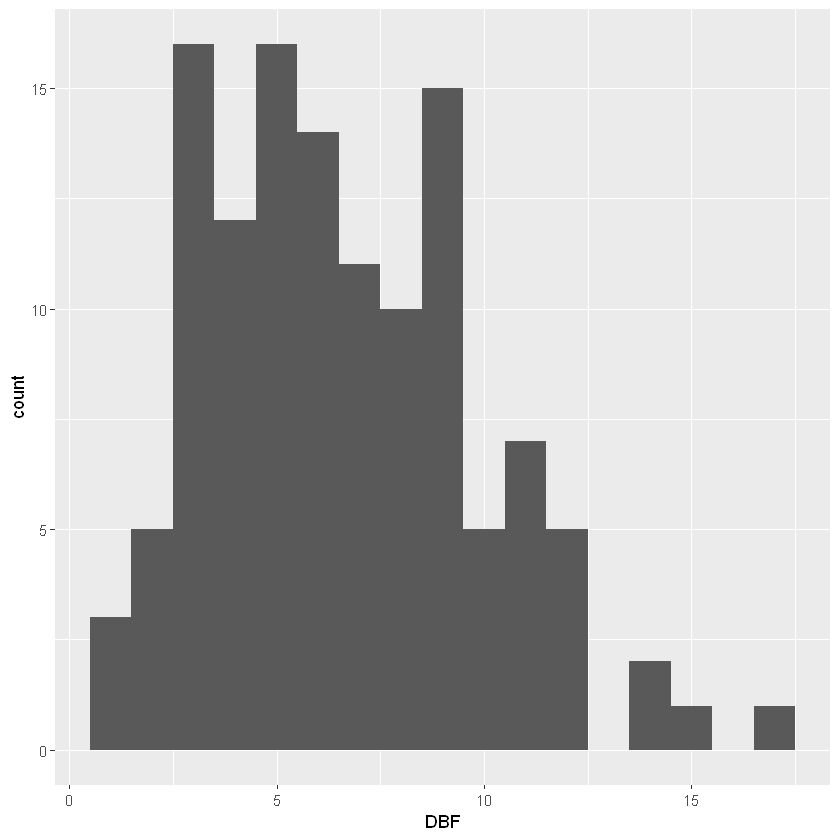

In [10]:
tournois %>%
mutate(DBF = DBF.1 + DBF.2) %>%
ggplot() +
aes(x = DBF) +
geom_histogram(binwidth=1)

Représenter l’évolution du nombre moyen de doubles fautes par match au cours des différents tours

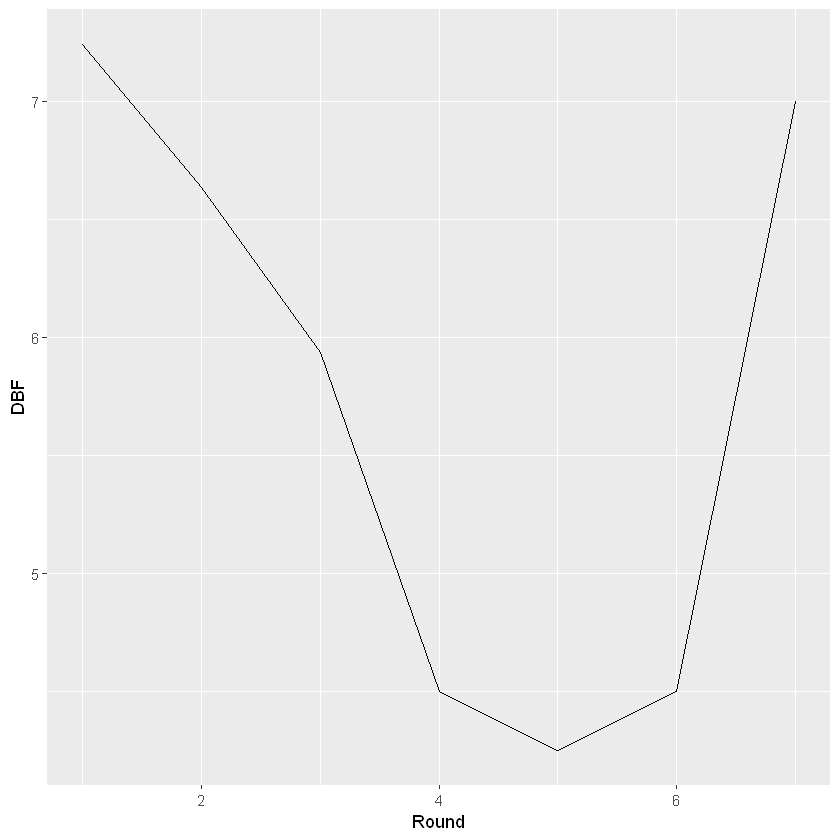

In [11]:
tournois %>%
group_by(Round) %>% 
summarise(DBF = mean(DBF.1 + DBF.2, na.rm = T))  %>% 
ggplot() + aes(x = Round, y = DBF) + geom_line()

Peut-on dire que le pourcentage de premier service a une influence sur le résultat ? On pourra faire uneboîte à moustaches ainsi qu’un test pour répondre à la question ?

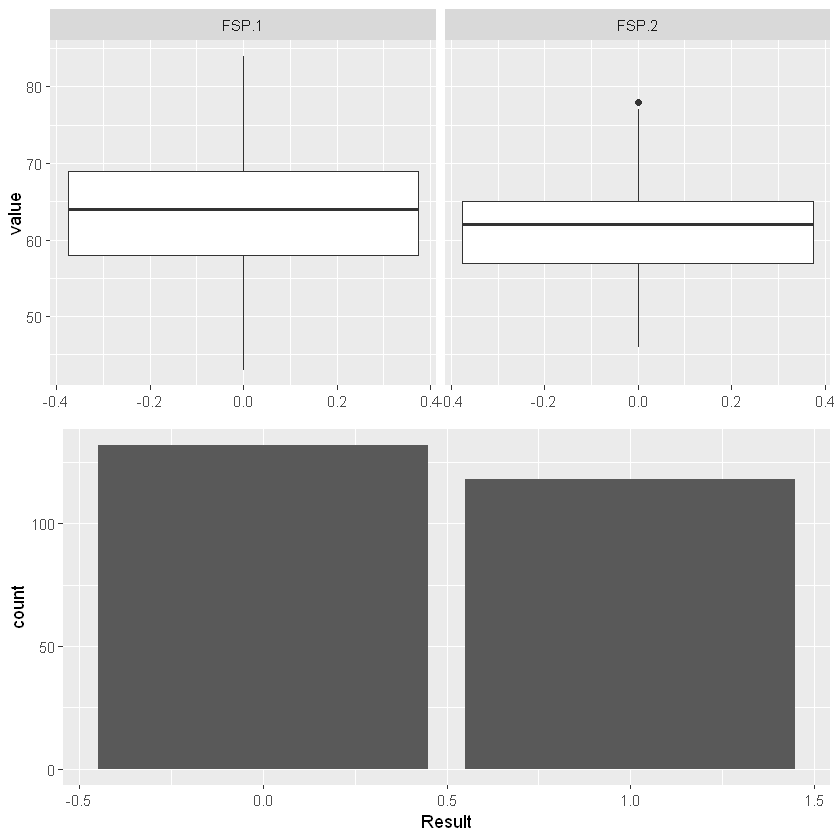

In [12]:
test <- tournois  %>% 
select(FSP.1, FSP.2, Result) %>%
gather(key = "FSP", value = "value", -Result)

grid.arrange(ggplot(test) + aes(y = value) + geom_boxplot() + facet_grid(~FSP),
             ggplot(test) + aes(x = Result) + geom_bar(),
             nrow = 2, ncol = 1,
             layout_matrix = matrix((1:2), ncol = 1, byrow = T))